In [1]:
import seaborn as sns 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats.mstats import winsorize
# %matplotlib inline

#맥 폰트 
# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

#윈도우 폰트 
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


In [2]:
expansion_normal = pd.read_csv('../Data/NA/expansion_normal.csv',encoding='cp949')
expansion_default = pd.read_csv('../Data/NA/expansion_default.csv',encoding='cp949')

recession_normal = pd.read_csv('../Data/NA/recession_normal.csv',encoding='cp949')
recession_default = pd.read_csv('../Data/NA/recession_default.csv',encoding='cp949')

transition_normal = pd.read_csv('../Data/NA/transition_normal.csv',encoding='cp949')
transition_default = pd.read_csv('../Data/NA/transition_default.csv',encoding='cp949')


all = pd.concat([expansion_normal,expansion_default,recession_normal,recession_default,transition_normal,transition_default],axis=0)
all_normal = all[all['부도']==0]
all_default = all[all['부도']==1]


from scipy.stats.mstats import winsorize

drop = ['회사명','거래소코드', '회계년도','부도']
all_normal_win = all_normal.drop(drop,axis=1)
for col in all_normal_win.columns:
    all_normal_win[col] = winsorize(all_normal_win[col], limits=[0.05, 0.05]) #0.5 값에 대해 윈저라이징 
all_normal.iloc[:,3:-1] = all_normal_win
    
all_default_win = all_default.drop(drop,axis=1)
for col in all_default_win.columns:
    all_default_win[col] = winsorize(all_default_win[col], limits=[0.05, 0.05]) #0.5 값에 대해 윈저라이징 
all_default.iloc[:,3:-1] = all_default_win

In [14]:
# Levene's test 

from scipy.stats import levene
levene_list = []
all_list_pick = []
all_list_drop = []

for col in all_normal.iloc[:,3:-1].columns: 
    a = levene(all_normal.loc[:,col],all_default.loc[:,col])
    levene_list.append(a)

all = pd.DataFrame(levene_list, index= all_normal.iloc[:,3:-1].columns)
s_t_test = all[all['pvalue']>0.05] #H0 귀무가설을 채택 => 등분산성
w_t_test = all[all['pvalue']<=0.05] #H1 귀무가설 기각 => 이분산성 



from scipy import stats
for col in w_t_test.loc[:,'pvalue'].index:
    w_t, w_p = stats.ttest_ind(all_normal.loc[:,col], all_default.loc[:,col], equal_var= False)
    
    # print("welch's t test Result\n ------------------------")
    # # print(f' {col} 이분산 t값은 {w_t:.3f} 이다. ')
    # print(f' {col} 이분산 p값은 {w_p:.3f} 이다. ')  
    
    if w_p <= 0.05 :
        # print("welch's t test Result\n ------------------------")
        # print(f' {col} 이분산 t값은 {w_t:.3f} 이다. ')
        # print(f' {col} 이분산 p값은 {w_p:.3f} 이다. ')  
        all_list_pick.append(col)
    else:
        all_list_drop.append(col)


for col in s_t_test.loc[:,'pvalue'].index:
    s_t, s_p = stats.ttest_ind(all_normal.loc[:,col], all_default.loc[:,col], equal_var= True)
    
                                                                                    #equal_var= False : 이분산 
                                                                                    #equal_var= True : 등분산
    # print('\n')
    # print("student's t test Result\n ------------------------")
    # # print(f' {col} 등분산 t값은 {s_t:.3f} 이다. ')
    # print(f' {col} 등분산 p값은 {s_p:.3f} 이다. ')

    if s_p <= 0.05 :
        # print('\n')
        # print("student's t test Result\n ------------------------")
        # print(f' {col} 등분산 t값은 {s_t:.3f} 이다. ')
        # print(f' {col} 등분산 p값은 {s_p:.3f} 이다. ')
        all_list_pick.append(col)
    else:
        all_list_drop.append(col)

print(all_list_pick)

# ['유동비율', '차입금의존도', '매출액증가율', '총자본증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률',
# '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', '매입채무회전률', '현금순환주기', 
# 'RETA', 'TLTA', '이자보상배율', 'vol유동비율', 'vol유형자산증가율', 'vol총자본증가율', 'vol매출액총이익률', 'vol매출액영업이익률',
# 'vol자기자본순이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol부채비율', 'vol이자보상배율', 'vol총자본회전률', 'vol매입채무회전률', '재고자산회전률', '매출채권회전률']

['유동비율', '차입금의존도', '매출액증가율', '총자본증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률', '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', '매입채무회전률', '현금순환주기', 'RETA', 'TLTA', '이자보상배율', 'vol유동비율', 'vol유형자산증가율', 'vol총자본증가율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol자기자본순이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol부채비율', 'vol이자보상배율', 'vol총자본회전률', 'vol매입채무회전률', '재고자산회전률', '매출채권회전률']


In [16]:
list = ['유동비율', '차입금의존도', '매출액증가율', '총자본증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률', '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', '매입채무회전률', '현금순환주기', 'RETA', 'TLTA', '이자보상배율', 'vol유동비율', 'vol유형자산증가율', 'vol총자본증가율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol자기자본순이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol부채비율', 'vol이자보상배율', 'vol총자본회전률', 'vol매입채무회전률', '재고자산회전률', '매출채권회전률','부도']

In [17]:
all = pd.concat([all_normal[list],all_default[list]],axis=0)
all_x = all.iloc[:,:-1]
all_y = all['부도']
all_y.value_counts()

In [19]:
from sklearn.model_selection import train_test_split
X_train,RAW_X_test,y_train,RAW_y_test = train_test_split(all_x,all_y,test_size = 0.3, stratify = all_y, random_state=1024)

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


scaler_std = StandardScaler()


X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(RAW_X_test)
X_test_std=pd.DataFrame(X_test_std)
X_test_std.columns = all_x.columns


sm = SMOTE(sampling_strategy={1:int(y_train.value_counts().iloc[0]/2),0:y_train.value_counts().iloc[0]},random_state=1024)
# train데이터를 넣어 복제함


X_train_std = pd.DataFrame(X_train_std)
X_resampled_std, y_resampled_std = sm.fit_resample(X_train_std,y_train)
X_resampled_std.columns = all_x.columns

print('After OverSampling, the shape of train_X: {}'.format(X_resampled_std.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_std.shape))
print('StandardScaler - SMOTE 적용 후 값의 분포 :\n',y_resampled_std.value_counts())




### 변수선정

### 상관계수

0.979
0.713


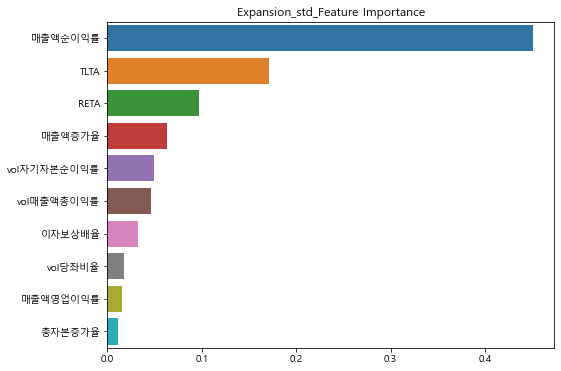

In [21]:
from sklearn.tree import  DecisionTreeClassifier

tree = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)
tree.fit(X_resampled_std,y_resampled_std)
score_tr = tree.score(X_resampled_std,y_resampled_std)
score_te = tree.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr))
# 1.000
print('{:.3f}'.format(score_te))

feature_imp = tree.feature_importances_

dt_seires= pd.Series(feature_imp,index=X_resampled_std.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Expansion_std_Feature Importance')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [22]:
ex_dt_std = pd.DataFrame(dt_top10,columns=['Top10 Expansion DT Feature Importances(std)'])

0.981
0.402


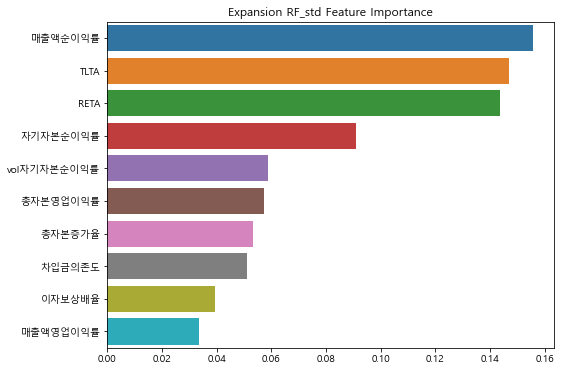

In [30]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(max_depth=9, n_estimators=90, random_state=1024)
tree.fit(X_resampled_std,y_resampled_std)
score_tr = tree.score(X_resampled_std,y_resampled_std)
score_te = tree.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr))
# 1.000
print('{:.3f}'.format(score_te))


feature_imp = tree.feature_importances_

dt_seires= pd.Series(feature_imp,index=X_resampled_std.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Expansion RF_std Feature Importance')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [31]:
ex_rf_std = pd.DataFrame(dt_top10,columns=['Top10 Expansion RF Feature Importances(std)'])


In [25]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 모델 입력, n_features_to_select: 골라낼 변수의 수, step: 한번에 몇개씩 제거할지 선택
rfe = RFE(lr, n_features_to_select=6, step=1)
X_resampled_std_logit = pd.DataFrame(X_resampled_std)
model = rfe.fit(X_resampled_std,y_resampled_std)
# 선택될 변수
model.support_
# 변수 중요도(숫자 높을수록 불필요하다)
model.ranking_

c:\Users\rumbi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\rumbi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

array([ 1,  6, 14, 13, 26, 25,  1,  4,  1,  1, 19, 15,  5, 24,  8,  1,  1,
       17, 18, 10, 16, 11,  2,  3, 23, 20,  7, 12, 22,  9, 21])

In [26]:
rank = model.ranking_.tolist()

lr_rank = pd.DataFrame(rank ,index = [X_resampled_std.columns],columns=['rank(std)'])
lr_rank.sort_values(by='rank(std)',inplace=True)
lr_rank_std = lr_rank.iloc[:22]
# lr_rank.iloc[:6].to_csv('../Data/features/lr_std.csv', encoding='cp949')

c:\Users\rumbi\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.954
0.465


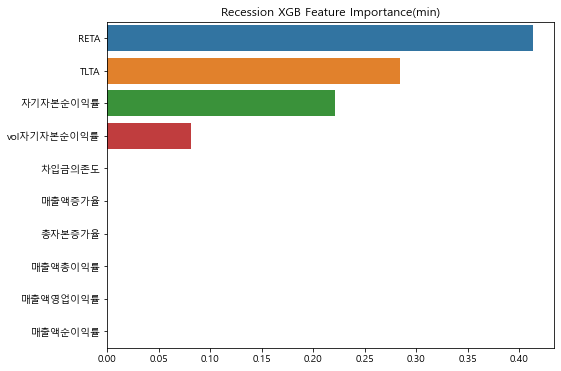

In [28]:
import xgboost
from xgboost import XGBClassifier
X_train,X_test,y_train,y_test = train_test_split(X_resampled_std,y_resampled_std,test_size=0.2)
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1,
              monotone_constraints='()', n_estimators=12, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
# reg_alpha=1
xg.fit(X_resampled_std,y_resampled_std)
score_tr = xg.score(X_resampled_std,y_resampled_std)
score_te = xg.score(RAW_X_test,RAW_y_test)
print('{:.3f}'.format(score_tr))
# 1.000
print('{:.3f}'.format(score_te))
feature_imp =xg.feature_importances_
dt_seires= pd.Series(feature_imp,index=X_resampled_std.columns)
dt_top10=dt_seires.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Recession XGB Feature Importance(min)')
sns.barplot(x=dt_top10,y=dt_top10.index)
plt.show()

In [29]:
ex_xgb_std = pd.DataFrame(dt_top10,columns=['Top10 Expansion XGBoost Feature Importances(std)'])
ex_xgb_std = ex_xgb_std.iloc[:3]
ex_xgb_std

In [44]:
a = pd.concat([ex_dt_std,ex_rf_std,ex_xgb_std],axis=1)  #lr_rank_std,ex_xgb_std

In [58]:
lr_rank_std.reset_index(inplace=True)

In [63]:
b = pd.merge(a,lr_rank_std,left_index=True, right_on='level_0', how='left')
b.set_index('level_0',inplace=True)

In [65]:
b

,Top10 Expansion DT Feature Importances(std),Top10 Expansion RF Feature Importances(std),Top10 Expansion XGBoost Feature Importances(std),rank(std)
level_0,,,,
매출액순이익률,0.450529,0.155623,NaN,1.0
TLTA,0.170678,0.146999,0.284491,1.0
RETA,0.096568,0.143811,0.413209,8.0
매출액증가율,0.063020,NaN,NaN,14.0
vol자기자본순이익률,0.048879,0.058605,NaN,2.0
vol매출액총이익률,0.045680,NaN,NaN,16.0
이자보상배율,0.032639,0.039319,NaN,1.0
vol당좌비율,0.017750,NaN,NaN,NaN
매출액영업이익률,0.015233,0.033452,NaN,NaN


In [68]:
select = ['매출액순이익률', 'TLTA', 'RETA', '매출액증가율', 'vol자기자본순이익률', 'vol매출액총이익률',
       '이자보상배율', '매출액영업이익률', '총자본증가율', '자기자본순이익률', '총자본영업이익률',
       '차입금의존도']

#### 상관계수보기

In [70]:
corr = all[select].corr()

<AxesSubplot:>

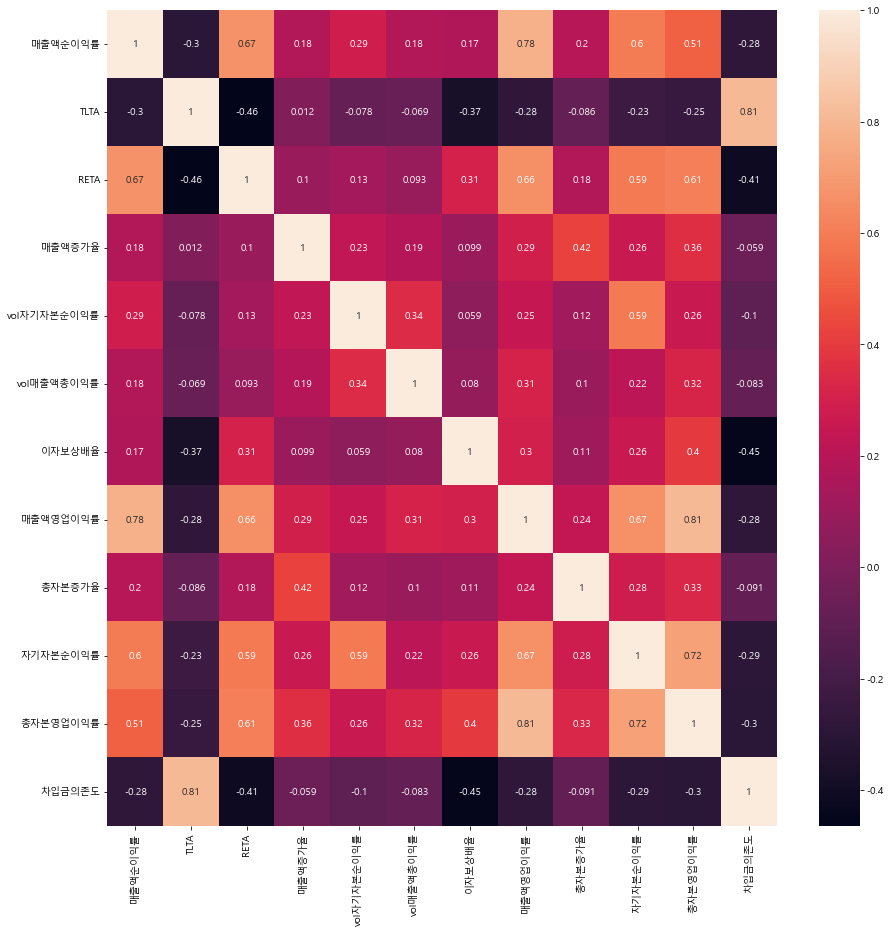

In [73]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)


### 예측모델

In [74]:
select_final =  ['매출액순이익률', 'TLTA', '매출액증가율', 'vol자기자본순이익률', 'vol매출액총이익률',
       '이자보상배율', '총자본증가율', '자기자본순이익률']

In [101]:
X_resampled=X_resampled_std[select_final]
X_test=RAW_X_test[select_final]
y_resampled = pd.DataFrame(y_resampled_std)
y_test = pd.DataFrame(RAW_y_test)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [96]:
X_resampled.shape

(18726, 8)

In [97]:
y_resampled.shape

(18726, 1)

In [98]:
X_test.shape

(5420, 8)

In [102]:
y_test.shape

(5420, 1)

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
# from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from tqdm.notebook import tqdm
from sklearn.preprocessing import Binarizer
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import GridSearchCV

# df = pd.DataFrame(columns =['models','Accuracy','Precision', 'Recall', 'F1 score','Auc_Score'])



class Model_Optimization():

      def __init__(self):
            
            global model_df
            model_df = pd.DataFrame(columns =['thresholds','models','Accuracy','Precision', 'Recall', 'F1 score','Auc_Score']) 


      #최적 파라미터 찾는 함수
      def grid(self,model_name, X_train=X_resampled, y_train=y_resampled, X_test=X_test,y_test=y_test):
            global model_df

            self.model_name = model_name
            self.X_test = X_test
            self.y_test = y_test
            self.X_train = X_train
            self.y_train  = y_train

            if model_name == "DecisionTreeClassifier":
                  dt = DecisionTreeClassifier()
                  parameters = [{"max_depth": [3,5,7], "min_samples_split":[3,5,7]}]
                  
            elif model_name == "RandomForestClassifier":
                  dt = RandomForestClassifier()
                  parameters = [{"max_depth": [3,5,7], "min_samples_split":[3,5,7]}]
                  
            elif model_name == "LogisticRegression":
                  dt = LogisticRegression()
                  parameters = {'penalty':['l2', 'l1'],
                  'C':[0.01, 0.1, 1, 5, 10]}
                  
            elif model_name == "Linear SVM": 
                  dt = SVC(probability=True)
                  parameters = [{'kernel':['linear'], 'C':[0.001, 0.01, 0.025, 0.1, 1, 10, 100]}]
                  
            elif model_name == "RBF SVM": 
                  dt = SVC(probability=True)
                  parameters = [{'gamma':[0.001, 0.01, 0.1, 1, 10, 100],'kernel':['rbf'],'C':[0.001, 0.01, 0.025, 0.1, 1, 10, 100]}]

            elif model_name == "AdaBoostClassifier":
                  dt= AdaBoostClassifier(random_state=0)
                  parameters={'n_estimators':[5]}
                  
            elif model_name == "GradientBoostingClassifier":
                  dt=GradientBoostingClassifier(random_state=0)
                  parameters = {
                  'n_estimators' : [100, 500],
                  'learning_rate' : [0.05, 0.1]
                              }

            elif model_name == "XGBClassifier":
                  dt=XGBClassifier(random_state=0,verbose=1)
                  parameters={'n_estimators':[100, 500], 'learning_rate':[0.05, 0.1], 'max_depth':[3,4]}
                  
            # elif model_name == "LGBMClassifier":
            #       dt=LGBMClassifier(random_state=0)
            #       parameters={'n_estimators':[400,800], 'learning_rate':[0.05, 0.1] , 'max_depth':[3,4]}
            
            elif model_name == "KNeighborsClassifier":
                  dt = KNeighborsClassifier()
                  parameters = {'n_neighbors':[3]}
                  
            elif model_name == 'MLPClassifier':
                  dt = MLPClassifier(random_state=0)
                  parameters={'max_iter':[1000], 'hidden_layer_sizes':[1], 'activation':['logistic'],
                              'solver':['sgd'], 'alpha':[0.01], 'batch_size':[32],
                              'learning_rate_init':[0.1], 'max_iter':[500]}
                  
            elif model_name == 'GaussianProcessClassifier':
                  dt = GaussianProcessClassifier(random_state=0)
                  parameters={'kernel': [1.0*RBF(1.0)]}
                  
            elif model_name == 'GaussianNB':
                  dt = GaussianNB()
                  parameters={}
                  
            elif model_name =='QuadraticDiscriminantAnalysis':
                  #선형판별분석
                  dt = QuadraticDiscriminantAnalysis()
                  parameters={}
                  
            # 최적 파라미터 찾기 
            self.grid_dt  = GridSearchCV(dt, param_grid = parameters, cv=5, refit =True, n_jobs=-1)
            self.grid_dt.fit(self.X_train, self.y_train)
            
            print(f"모델명: {model_name}")
            print(f"학습 데이터 최적 파라미터\n: {self.grid_dt.best_params_}")
            print(f"학습 데이터 최고 정확도\n: {self.grid_dt.best_score_:.3f}")

            #지도학습 알고리즘 
            estimator = self.grid_dt.best_estimator_
            y_pred = pd.DataFrame(estimator.predict(self.X_test))
            y_pred_probability = pd.DataFrame(estimator.predict_proba(self.X_test))
            # print(f"예측 정확도\n: {accuracy_score(self.y_test, y_pred):.3f}")

            prediction = pd.concat([y_pred_probability, y_pred], axis = 1)

            prediction.columns = ["Negative(0)", "Positive(1)", "y_pred"]

            print(prediction)
            self.pred_proba_1 = np.array(prediction["Positive(1)"]).reshape(-1, 1)
            self.accuracy= round(accuracy_score(self.y_test, y_pred),3)
            self.FPRs, self.TPRs, self.thresholds = roc_curve(self.y_test, self.pred_proba_1)
            
            return estimator



      # 단일 모델 임계치별 score 출력 하는 함수 *주의  self.thresholds 값 내부 리스트 수정해줘야함 
      def get_thresholds_score(self):
            global model_df

            
            self.thresholds = [0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

            #평가지표용 리스트생성
            precisions = []
            recalls = []
            f1_scores = []
            auc_scores=[]
            threshold_ =[]
            
            
            
            for threshold in self.thresholds:
                  binarizer = Binarizer(threshold= threshold)
                  # print(threshold)
                  # 임계점 지정하여 Binariazer() 객체 생성
                  pred_proba = binarizer.fit_transform(self.pred_proba_1)
                  # print(pred_proba)
                  # 임계점을 기준으로 데이터 변환

                  precision = precision_score(self.y_test, pred_proba)
                  recall = recall_score(self.y_test, pred_proba)
                  f1score = f1_score(self.y_test, pred_proba)
                  auc_score=roc_auc_score(self.y_test, self.pred_proba_1)

                  precisions.append(precision)
                  recalls.append(recall)
                  f1_scores.append(f1score)
                  auc_scores.append(auc_score)
                  threshold_.append(threshold)
                  

            results = pd.DataFrame(data = {"thresholds":threshold_, "models":self.model_name,"Accuracy":self.accuracy,"Precision": precisions,
                                          "Recall": recalls,
                                          "F1 score": f1_scores,"Auc_Score":auc_scores}, index = self.thresholds)                 

            print(f'단일 모델 results : {results}')      
            return results




      #모든 모델 성능 비교 함수 
      def get_model_socre(self,input_list):
            global model_df 

            mod = Model_Optimization()
            for i in tqdm(input_list):
                  mod.grid(model_name=i)
                  results_df = mod.get_thresholds_score()

                  #평가지표 데이터 프레임화 
                  print(results_df)
                  #기준 평가지표로 정렬
                  results_df.sort_values("F1 score", ascending=False, inplace=True)
                  new_model_df= results_df.iloc[:1]
                  model_df = pd.concat([model_df,new_model_df])
                  
            return model_df

In [106]:
list = ['XGBClassifier','RandomForestClassifier']
model = Model_Optimization()
model.get_model_socre(list)
model_df

  0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\rumbi\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\rumbi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
모델명: XGBClassifier
학습 데이터 최적 파라미터
: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
학습 데이터 최고 정확도
: 0.996
      Negative(0)  Positive(1)  y_pred
0        0.000501     0.999499     1.0
1        0.806002     0.193998     0.0
2        0.999936     0.000064     0.0


c:\Users\rumbi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


모델명: RandomForestClassifier
학습 데이터 최적 파라미터
: {'max_depth': 7, 'min_samples_split': 5}
학습 데이터 최고 정확도
: 0.969
      Negative(0)  Positive(1)  y_pred
0        0.000000     1.000000     1.0
1        0.550000     0.450000     0.0
2        0.994516     0.005484     0.0
3        0.589717     0.410283     0.0
4        0.599214     0.400786     0.0
...           ...          ...     ...
5415     0.599235     0.400765     0.0
5416     0.630000     0.370000     0.0
5417     0.867254     0.132746     0.0
5418     0.650000     0.350000     0.0
5419     0.630000     0.370000     0.0

[5420 rows x 3 columns]
단일 모델 results :      thresholds                  models  Accuracy  Precision    Recall  \
0.1         0.1  RandomForestClassifier     0.679   0.014490  1.000000   
0.2         0.2  RandomForestClassifier     0.679   0.016919  0.971014   
0.3         0.3  RandomForestClassifier     0.679   0.017641  0.971014   
0.4         0.4  RandomForestClassifier     0.679   0.026131  0.971014   
0.5         0

,thresholds,models,Accuracy,Precision,Recall,F1 score,Auc_Score
0.9,0.9,XGBClassifier,0.703,0.041257,0.913043,0.078947,0.856907
0.9,0.9,RandomForestClassifier,0.679,0.047737,0.840580,0.090343,0.849201


In [107]:
model_df.to_csv('../Data/result/전체기간.csv',index=False, encoding='cp949')